In [1]:
import astropy.io.fits as pyfits

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read label file

In [2]:
label_file = "R_filtrid/BD_decomp_asi.txt"
galaxies_info = pd.read_table(label_file,header=None,index_col=False,skiprows=1)
part1 = galaxies_info.loc[galaxies_info[1].isnull(),[0,2,3,4,5,6]]
part1.columns = ["cnr","kval","varb","dust","popul","rescale"]
part2 = galaxies_info.loc[galaxies_info[1].notnull(),[0,1,2,3,4,5]]
part2.columns = ["cnr","kval","varb","dust","popul","rescale"]
galaxies_info = part1.append(part2)
galaxies_info.head()

,cnr,kval,varb,dust,popul,rescale
0,105,2.0,0,T,T,F
1,106,1.0,1,F,F,F
2,107,2.0,0.2,F,T,F
3,108,1.5,0,F,T,F
4,113,2.0,0,F,T,F


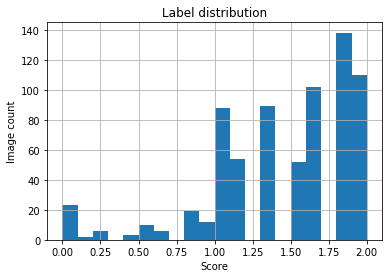

In [3]:
galaxies_info['kval'].hist(bins=20,figsize=(6,4))
plt.title("Label distribution")
plt.xlabel("Score")
plt.ylabel("Image count")

### Read fits files, log transform

In [4]:
galaxies_fits = []
path = "R_filtrid/"
a=1000
log_transform = True
h_vals = []
w_vals = []
for num in galaxies_info['cnr']:
    fits_file = pyfits.getdata(path+str(num)+".fits")
    h_vals.append(fits_file.shape[0])
    w_vals.append(fits_file.shape[1])
    if log_transform:
        fits_file = np.log(a*(fits_file-fits_file.min())/(fits_file.max()-fits_file.min())+1)/np.log(a)
    galaxies_fits.append(fits_file)

Min height= 76  Max height= 1450  Min width= 100  Max width= 1204


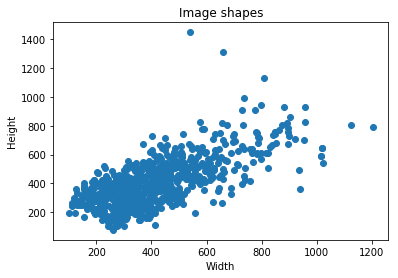

In [5]:
plt.plot(w_vals,h_vals,'o')
plt.title("Image shapes")
plt.ylabel("Height")
plt.xlabel("Width")
print("Min height=",min(h_vals)," Max height=",max(h_vals), " Min width=",min(w_vals)," Max width=",max(w_vals))

### Display examples

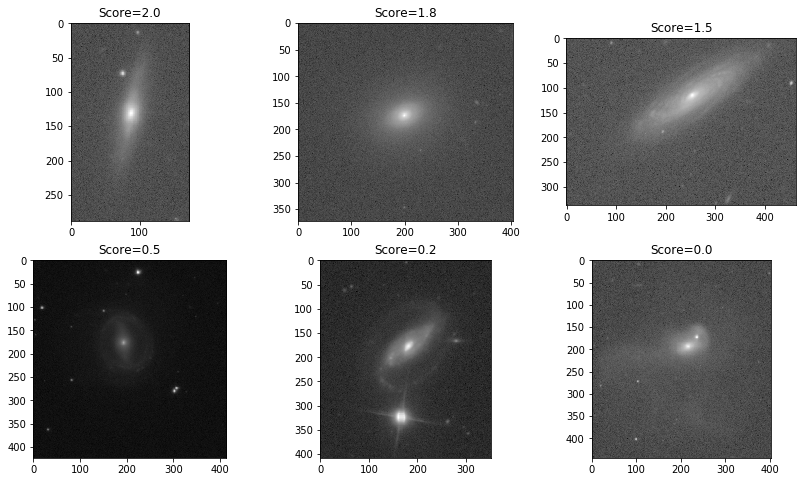

In [27]:
plt.figure(1,figsize=(14,8))
plt.subplot(231)
plt.imshow(galaxies_fits[0], cmap='gray')
plt.title('Score=2.0')
plt.subplot(232)
plt.imshow(galaxies_fits[8], cmap='gray')
plt.title('Score=1.8')
plt.subplot(233)
plt.imshow(galaxies_fits[14], cmap='gray')
plt.title('Score=1.5')
plt.subplot(234)
plt.imshow(galaxies_fits[34], cmap='gray')
plt.title('Score=0.5')
plt.subplot(235)
plt.imshow(galaxies_fits[254], cmap='gray')
plt.title('Score=0.2')
plt.subplot(236)
plt.imshow(galaxies_fits[593], cmap='gray')
plt.title('Score=0.0')

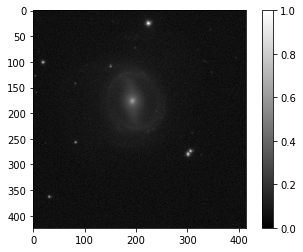

In [25]:
plt.imshow(galaxies_fits[34], cmap='gray')
plt.colorbar()